In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [8]:
dataset=pd.read_csv("flightdata.csv")

In [9]:
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [10]:
dataset.tail()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN
11230,2016,4,12,30,5,DL,N843DN,2005,10397,ATL,...,925,913.0,-12.0,0.0,0.0,0.0,120.0,110.0,594.0,NaN


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [12]:
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [13]:
dataset.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [14]:
dataset['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

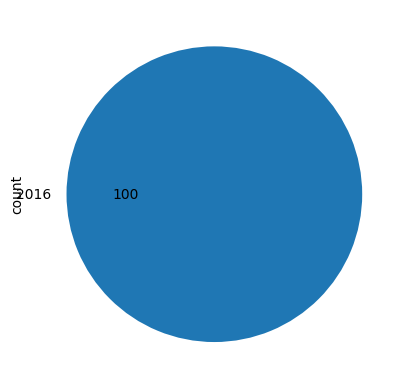

In [15]:
import matplotlib.pyplot as plt
dataset['YEAR'].value_counts().plot(kind='pie',autopct='%.0f')
plt.show()

<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

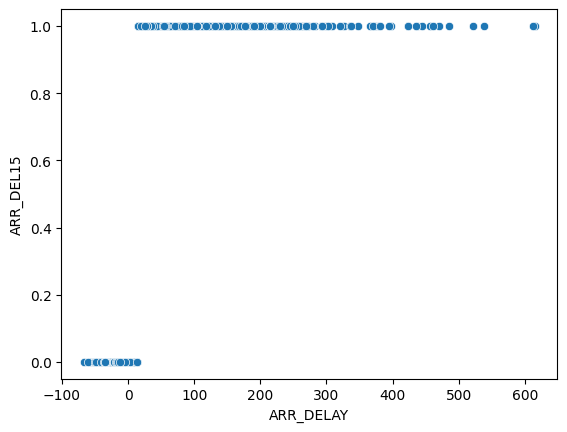

In [16]:

sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=dataset)

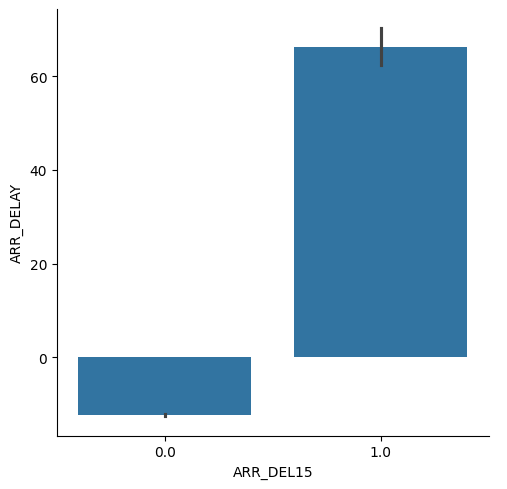

In [17]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=dataset)

<Axes: >

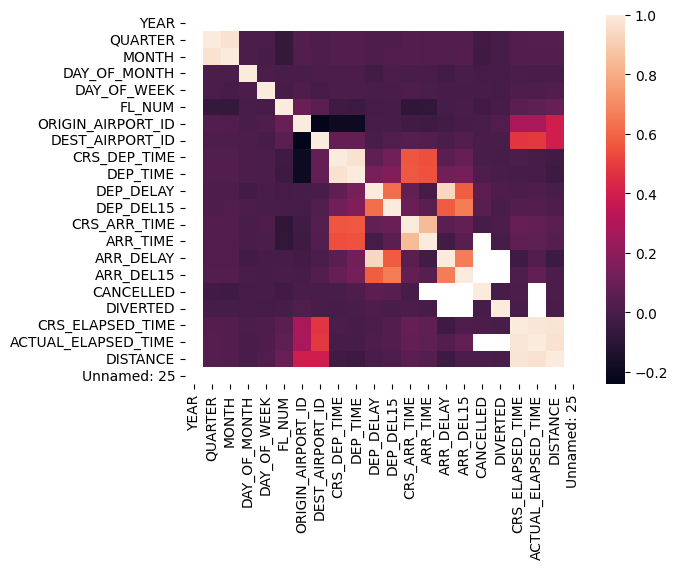

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
non_numerical_cols=dataset.select_dtypes(exclude=[np.number]).columns
dataset_numeric=dataset.drop(non_numerical_cols,axis=1)
sns.heatmap(dataset_numeric.corr())

In [19]:
import pandas as pd
dataset=dataset.drop("Unnamed: 25",axis=1)
dataset.isnull().sum()


YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [20]:
dataset.shape

(11231, 25)

In [21]:
print(dataset.columns)
dataset=dataset[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME","DEP_DEL15","ARR_DEL15"]]
dataset.isnull().sum()

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE'],
      dtype='object')


FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [22]:
dataset=dataset.fillna({'ARR_DEL15':1})
dataset=dataset.fillna({'dep_del15':0})
dataset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,NaN,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [23]:
import math
for index,row in dataset.iterrows():
  dataset.loc[index,'CRS_ARR_TIME']=math.floor(row['CRS_ARR_TIME']/100)
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [24]:
dataset.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['ORIGIN']=le.fit_transform(dataset['ORIGIN'])
dataset['DEST']=le.fit_transform(dataset['DEST'])
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [26]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
z=oh.fit_transform(dataset.iloc[:,4:5]).toarray()
t=oh.fit_transform(dataset.iloc[:,5:6]).toarray()
z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [27]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [28]:
dataset = dataset.dropna()

In [29]:
x=dataset.iloc[:,0:8].values
y=dataset.iloc[:,8:9].values


In [30]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_test.shape

(2225, 8)

In [33]:
x_train.shape

(8899, 8)

In [34]:
y_test.shape

(2225, 1)

In [35]:
y_train.shape

(8899, 1)

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9182022471910113


C:\Users\anush\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anush\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Confusion matrix:
 [[1852   80]
 [ 102  191]]


In [38]:
print("Classification report:\n", metrics.classification_report(y_test, y_pred))


Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1932
         1.0       0.70      0.65      0.68       293

    accuracy                           0.92      2225
   macro avg       0.83      0.81      0.82      2225
weighted avg       0.92      0.92      0.92      2225



In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

C:\Users\anush\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9150561797752809


In [40]:
cm_rf = metrics.confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix:\n", cm_rf)

Confusion matrix:
 [[1863   69]
 [ 120  173]]


In [41]:
print("Classification report:\n", metrics.classification_report(y_test, y_pred_rf))

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1932
         1.0       0.71      0.59      0.65       293

    accuracy                           0.92      2225
   macro avg       0.83      0.78      0.80      2225
weighted avg       0.91      0.92      0.91      2225



In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)
y_pred_classifier = classifier.predict(x_test)
accuracy_classifier = accuracy_score(y_test, y_pred_classifier)
print("Accuracy:",accuracy_classifier)

Accuracy: 0.8606741573033708


In [43]:
cm_classifier = metrics.confusion_matrix(y_test, y_pred_classifier)
print("Confusion matrix:\n", cm_classifier)


Confusion matrix:
 [[1768  164]
 [ 146  147]]


In [44]:
print("Classification report:\n", metrics.classification_report(y_test, y_pred_classifier))


Classification report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1932
         1.0       0.47      0.50      0.49       293

    accuracy                           0.86      2225
   macro avg       0.70      0.71      0.70      2225
weighted avg       0.86      0.86      0.86      2225



In [46]:
# prompt: train and test accuracy for linear regression random forest and decision tree
def comparemodel():
# Train and test accuracy for Logistic Regression
    lr_accuracy_train = lr.score(x_train, y_train)
    lr_accuracy_test = lr.score(x_test, y_test)
    print("Logistic Regression:")
    print("- Train accuracy:", lr_accuracy_train)
    print("- Test accuracy:", lr_accuracy_test)
    # Train and test accuracy for Random Forest
    rf_accuracy_train = rf.score(x_train, y_train)
    rf_accuracy_test = rf.score(x_test, y_test)
    print("\nRandom Forest:")
    print("- Train accuracy:", rf_accuracy_train)
    print("- Test accuracy:", rf_accuracy_test)
     #Train and test accuracy for Decision Tree
    classifier_accuracy_train = classifier.score(x_train, y_train)
    classifier_accuracy_test = classifier.score(x_test, y_test)
    print("\nDecision Tree:")
    print("- Train accuracy:", classifier_accuracy_train)
    print("- Test accuracy:", classifier_accuracy_test)
comparemodel()

Logistic Regression:
- Train accuracy: 0.9094280256208562
- Test accuracy: 0.9182022471910113

Random Forest:
- Train accuracy: 0.9998876278233509
- Test accuracy: 0.9150561797752809

Decision Tree:
- Train accuracy: 1.0
- Test accuracy: 0.8606741573033708


C:\Users\anush\AppData\Local\Temp\ipykernel_23624\2207813846.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="Set3")


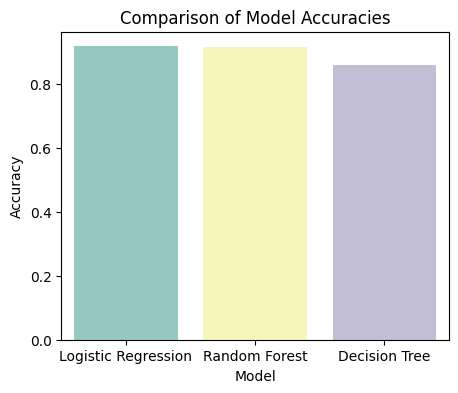

In [47]:
# prompt: comparision  graph of models
import matplotlib.pyplot as plt
model_names = ["Logistic Regression", "Random Forest", "Decision Tree"]
accuracies = [accuracy, accuracy_rf, accuracy_classifier]

plt.figure(figsize=(5, 4))
sns.barplot(x=model_names, y=accuracies, palette="Set3")

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.show()


In [57]:
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()
for i in range(x_train.shape[1]):
  if isinstance(x_train[0,i],str):
    x_train[:,i]=le.fit_transform(x_train[:,i])
    x_test[:,i]=le.fit_transform(x_test[:,i])
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

C:\Users\anush\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9150561797752809


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_train)
accuracy_rf = accuracy_score(y_train, y_pred_rf)
print("Accuracy:", accuracy_rf)

C:\Users\anush\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9998876278233509


In [60]:
import pickle
pickle.dump(rf,open('flight.pkl','wb'))